# Models
In diesem Notebook:

**1. X, y, Train, Validate und Test Sets erstellen**

**2. Hyperparameter für Modell 1 und Modell 2 festlegen**

**3. Modell 1 (logistische Regression) und Modell 2 (Decision Tree) erstellen**

**4. Modelle bewerten**

### 1. X, y, Train, Validate und Test Sets erstellen

In [198]:
#Die aufbereiteten Daten einlesen
import pandas as pd
import numpy as np

data = pd.read_csv("../Data Cleaning/clean_data.csv",)

data  

,color,size,weight,fruit_type_apple,fruit_type_banana,fruit_type_grape
0,0.729387,-1.777319,-1.089371,0,0,1
1,-0.973462,1.144301,0.470776,1,0,0
2,1.297003,1.144301,0.334214,0,1,0
3,0.161771,-1.777319,-1.118982,0,0,1
4,1.864620,1.144301,0.492806,0,1,0
...,...,...,...,...,...,...
174,-0.405846,0.170428,-1.033580,0,0,1
175,-0.405846,-0.803445,-1.175107,0,0,1
176,1.297003,1.144301,-0.430096,0,1,0
177,0.161771,0.170428,-1.167769,0,0,1


In [ ]:
#Funktion, um aus einem Abschnitt der Tabelle Eingaben und Ausgaben zu erzeugen
def scale_dataset(dataframe):
    X = dataframe.drop(columns=['fruit_type_apple', 'fruit_type_banana', 'fruit_type_grape'])
    y = dataframe.drop(columns=['color', 'size', 'weight'])
    
    data = np.hstack((X, np.reshape(y, (len(y),3)))) #führt wieder beides zusammen 
   
    
    return data, X, y

In [200]:
#Erstellt die Sets für Training und Testing 

from sklearn.model_selection import train_test_split

#train, valid, test = np.split(data.sample(frac=1),[int(0.6*len(data)),int(0.8*len(data))])
#np.split(data, [3, 7]) => Teilt data an den Indezes 3 und 7 
#data.sample(frac=1) => mischt data durch + gibt 100% der Datensätze zurück (wieder als Dataframe)

data, X, y = scale_dataset(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)


#Das LogisticRegression Model erwartet als y ein 1d Array, daher zunächst:
y_train_1d = y_train.idxmax(axis=1)
y_test_1d = y_test.idxmax(axis=1)
#damit lassen sich die drei Spalten von onehot encoding zurück in eine
#1d Spalte mit den werten fruit_type_apple, fruit_type_banana, fruit_type_grape umwandeln


In [201]:
#Zeigt die Verteilung von fruit_types in den output sets von train, valid und tests
print("Training Sets")
print(len(y_train[y_train["fruit_type_apple"] == 1]))
print(len(y_train[y_train["fruit_type_banana"] == 1]))
print(len(y_train[y_train["fruit_type_grape"] == 1]))
print()

#print("Validation Sets")
#print(len(y_valid[y_valid["fruit_type_apple"] == 1]))
#print(len(y_valid[y_valid["fruit_type_banana"] == 1]))
#print(len(y_valid[y_valid["fruit_type_grape"] == 1]))
#print()

print("Test Sets")
print(len(y_test[y_test["fruit_type_apple"] == 1]))
print(len(y_test[y_test["fruit_type_banana"] == 1]))
print(len(y_test[y_test["fruit_type_grape"] == 1]))
print()


Training Sets
49
46
48

Test Sets
12
12
12



### 2. Hyperparameter für Modell 1 und Modell 2 festlegen

In [202]:
#Imports
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

**Logistische Regression: Grid Search für die Parameter: C, penalty, solver, max_iter, multi_class**

In [203]:
param_grid_logreg = {
    'C' : [0.001,0.01,0.1,1,5,10, 50 ,100, 150,1000,10000], #kleine Werte = starke Regularisierung, große Werte = schwächere Regul.
    'penalty': ['l2'], #nur l2 Regul. weil l1 nicht kompatibel mit den Solvern für Multiklassen Klassif.  ist
    'solver': ['newton-cg'], #SOlver newton-cg war der einzige Multiklasif. Solver, bei dem das Modell konvergiert
    'max_iter' : [100,1000,2500,5000, 10000],
    'multi_class': ['ovr','multinomial']
}

grid_search_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5)

grid_search_logreg.fit(X_train, y_train_1d)

best_params_logreg = grid_search_logreg.best_params_
print("Gefundene Parameter:", grid_search_logreg.best_params_)


Gefundene Parameter: {'C': 50, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}


**Decision Tree: Grid Search für die Parameter: criterion, splitter, max_depth, min_samples_split, min_samples_leaf, max_features**

In [215]:
param_grid_dectree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [100], # hoher Wert hat die besten ergebnisse erzielt (durch Ausprobieren herausgefunden)
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1,2,3],
    'max_features': [1, 2, 3]  
}


grid_search_dectree = GridSearchCV(DecisionTreeClassifier(), param_grid_dectree, cv=5, verbose=1, n_jobs=-1)


grid_search_dectree.fit(X_train, y_train)

best_params_dectree = grid_search_dectree.best_params_
print("Gefundene Parameter:", grid_search_dectree.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Gefundene Parameter: {'criterion': 'gini', 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'best'}


##  3.Modell 1 (logistische Regression) und Modell 2 (Decision Tree) erstellen

#### Modell 1 - logistische Regression (ohne Parameteranpassung)

In [216]:
#OHNE PARAMETRISIERUNG
model1 = LogisticRegression()
model1.fit(X_train, y_train_1d)

LogisticRegression()

In [217]:
#MIT PARAMETRISIERUNG
model1_tuned = LogisticRegression(**best_params_logreg)
model1_tuned.fit(X_train, y_train_1d)

LogisticRegression(C=50, multi_class='multinomial', solver='newton-cg')

#### Modell 2 - Decision Tree (ohne Parameteranpassung)

In [218]:
#OHNE PARAMETRISIERUNG
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [219]:
#MIT PARAMETRISIERUNG
model2_tuned= DecisionTreeClassifier(**best_params_dectree)
model2_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=100, max_features=3, min_samples_leaf=3,
                       min_samples_split=4)

##  4.Modelle bewerten

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#### Hilfsfunktionen für  Umwandlungen (benötigt für bestimmte Metriken) und Darstellungen  

In [221]:
## Funktion zur Umwandlung des OneHot (3 Spalten) Outputs, um später eine Confusion Matrix erstellen zu können
def transform_y_to_1d(onehot_df):

    #y Aufbau wenn als OneHot => Spalte 1 "..._apple", Spalte 2 "...banana", Spalte 3 "..._grape",  
    #soll zu einem 1spaltigen dataframe umgewandelt werden:
    
    if isinstance(onehot_df, pd.DataFrame):
        onehot_df = onehot_df.to_numpy() # ggf zu np array für np.argmax
    
    onehot_df_labels = np.argmax(onehot_df, axis=1) # sucht in jeder Zeile nach dem größten wert (größter wert = 1) und erstellt so eine liste [0,2,1,2,2,1,0,...]
    onehot_df_1d = np.where(onehot_df_labels == 0, 'fruit_type_apple', np.where(onehot_df_labels == 1, 'fruit_type_banana', 'fruit_type_grape'))
    
    return onehot_df_1d
    #y_valid_labels = np.argmax(y_predictions_model2, axis=1) # such in jeder Zeile nach dem größten wert (größter wert = 1) 
    #y_predictions_model2_1d = np.where(y_valid_labels == 0, 'apple', np.where(y_valid_labels == 1, 'banana', 'grape'))
    #y_predictions_model2_1d
    
    
def present_confusion_matrix(confusionMatrix, title="Title of yout matrix", labels=[]):
    
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Durch Model vorhergesagte Labels')
    plt.ylabel('Tatsächliche Labels')
    plt.title(title)
    plt.show()


#### Ermittlung von Accuracy, Confusion Matrices, F1-Scores und Classification Reports

In [222]:
### Logis. Regression ###

#Standard Parametrisierung
y_predictions_model1 = model1.predict(X_test) #Validation X übergeben und predicitons speichern
accuracy_model1 = round(accuracy_score(y_test_1d, y_predictions_model1),3)*100 #compares Validation y mit den predictions
confusionMatrix_model1 = confusion_matrix(y_test_1d,
                                          y_predictions_model1,
                                          labels=["fruit_type_apple", "fruit_type_banana", "fruit_type_grape"])
f1_model1 = f1_score(y_test_1d, y_predictions_model1, average='macro')

#durch Grid Search parametrisiert
y_predictions_model1_tuned = model1_tuned.predict(X_test) #Validation X übergeben und predicitons speichern
accuracy_model1_tuned = round(accuracy_score(y_test_1d, y_predictions_model1_tuned),3)*100 #compares Validation y mit den predictions
confusionMatrix_model1_tuned = confusion_matrix(y_test_1d,
                                                y_predictions_model1_tuned,
                                                labels=["fruit_type_apple", "fruit_type_banana", "fruit_type_grape"])
f1_model1_tuned = f1_score(y_test_1d, y_predictions_model1_tuned, average='macro')




### Decision Tree ###

#Standard Parametrisierung
y_predictions_model2  = model2.predict(X_test)
accuracy_model2 = round(accuracy_score(y_test, y_predictions_model2),3)*100
confusionMatrix_model2 = confusion_matrix(y_test_1d, 
                                          transform_y_to_1d(y_predictions_model2), 
                                          labels=["fruit_type_apple", "fruit_type_banana", "fruit_type_grape"])
f1_model2 = f1_score(y_test_1d, transform_y_to_1d(y_predictions_model2), average='macro')

#durch Grid Search parametrisiert
y_predictions_model2_tuned  = model2_tuned.predict(X_test)
accuracy_model2_tuned = round(accuracy_score(y_test, y_predictions_model2_tuned),3)*100
confusionMatrix_model2_tuned = confusion_matrix(y_test_1d, 
                                                transform_y_to_1d(y_predictions_model2_tuned), 
                                                labels=["fruit_type_apple", "fruit_type_banana", "fruit_type_grape"])
f1_model2_tuned = f1_score(y_test_1d, transform_y_to_1d(y_predictions_model2_tuned), average='macro')


#Darstellung der Ergebnisse vorbereiten

# Accuracy

accuracy_results = pd.DataFrame( columns=['Logistic Regression', 'Decision Tree'], index=['Standard Parametrisierung', 'Custom Parametrisierung'])
accuracy_results['Logistic Regression']  = [accuracy_model1, accuracy_model1_tuned]
accuracy_results['Decision Tree']  = [accuracy_model2,accuracy_model2_tuned]

#Confusion Matrices

confusion_matrices_logreg = [confusionMatrix_model1,confusionMatrix_model1_tuned]
confusion_matrices_dectree = [confusionMatrix_model2,confusionMatrix_model2_tuned]


# F1-Score

f1_results = pd.DataFrame( columns=['Logistic Regression', 'Decision Tree'], index=['Standard Parametrisierung', 'Custom Parametrisierung'])
f1_results['Logistic Regression']  = [f1_model1, f1_model1_tuned]
f1_results['Decision Tree']  = [f1_model2,f1_model2_tuned]

In [223]:
f1_results

,Logistic Regression,Decision Tree
Standard Parametrisierung,0.616296,0.774106
Custom Parametrisierung,0.626471,0.829091


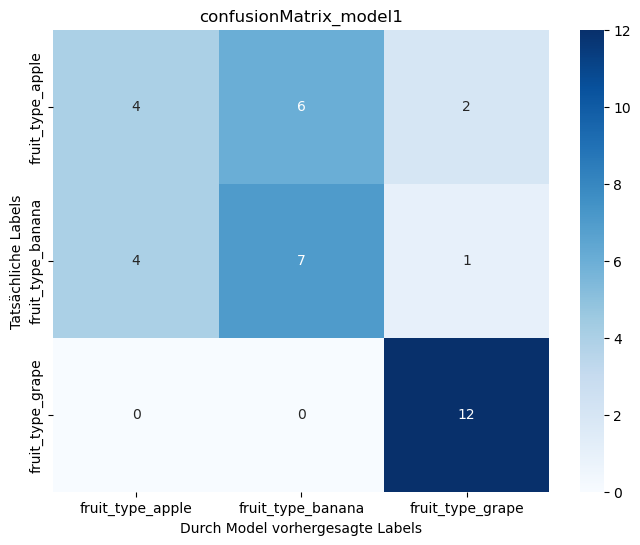

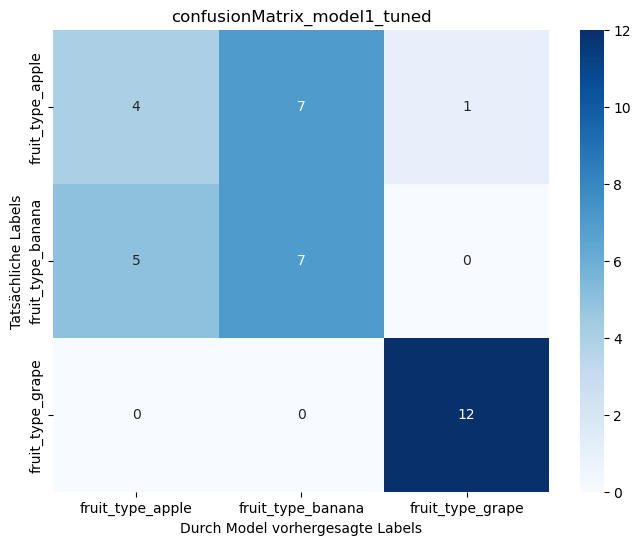

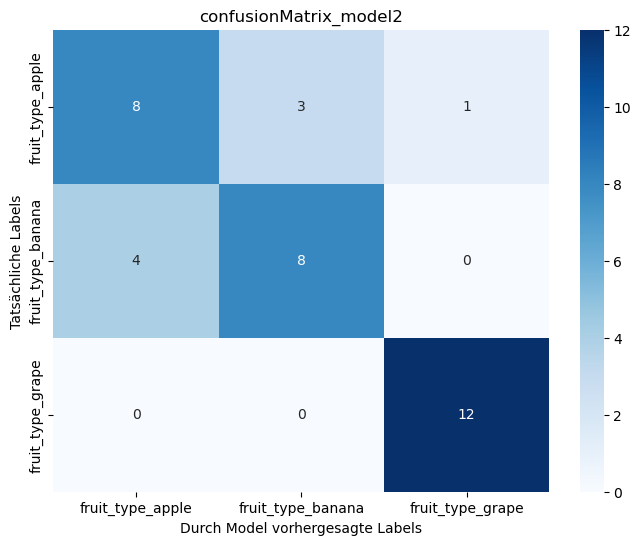

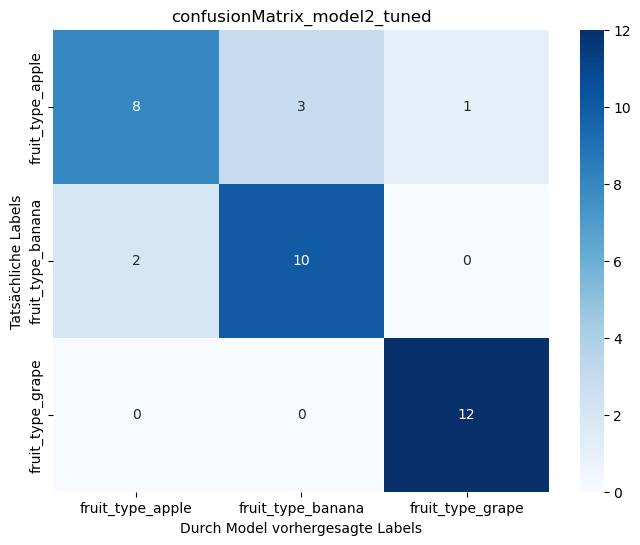

In [224]:
#######Confusion Matrices########
present_confusion_matrix(confusionMatrix_model1, title="confusionMatrix_model1", labels= ["fruit_type_apple", "fruit_type_banana", "fruit_type_grape"])
present_confusion_matrix(confusionMatrix_model1_tuned, title="confusionMatrix_model1_tuned", labels= ["fruit_type_apple", "fruit_type_banana", "fruit_type_grape"])
present_confusion_matrix(confusionMatrix_model2, title="confusionMatrix_model2", labels= ["fruit_type_apple", "fruit_type_banana", "fruit_type_grape"])
present_confusion_matrix(confusionMatrix_model2_tuned, title="confusionMatrix_model2_tuned", labels= ["fruit_type_apple", "fruit_type_banana", "fruit_type_grape"])

In [225]:
accuracy_results

,Logistic Regression,Decision Tree
Standard Parametrisierung,63.9,77.8
Custom Parametrisierung,63.9,83.3
